In [5]:
from metaflow import Flow, get_metadata, namespace
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage
from pyLDAvis.gensim import prepare
import pyLDAvis
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set()
pyLDAvis.enable_notebook()

In [6]:
!python lda_jensen_shannon.py show

Metaflow 2.0.5 executing LDAJensenShannonFlow for user:dev

Use an LDA components analysis for text documents and then evaluate their
similarities using Jensen-Shannon Distance

1. Loading data
2. Treating Data
3. Generating LDA Component Analysis
    3.1 Finding Optimal Number of Components
    3.2 Generating Topics
4. Similarity Jensen-Shannon
    4.1 Creating Topics Similarities Pairs
    4.2 Generating Heatmap for Text Similarities
5. Bibliography

Step start
    Load preprocessed documents
    => selecting_number_components

Step selecting_number_components
    Using the elbow curve analysis.
    In this analysis we try models from an interval of topics numbers
    and using each model's topics coherence values to score them.
    => generating_topics

Step generating_topics
    Generate topics and describe documents based
    on how much they fit in each topic.
    => generating_text_pairs

Step generating_text_pairs
    Create a new dataframe with pair of documents. If the given


In [14]:
!python lda_jensen_shannon.py --no-pylint run --tag visualisation --num_samples 100
!python lda_jensen_shannon.py --no-pylint run --tag performance --num_samples 1000

Metaflow 2.0.5 executing LDAJensenShannonFlow for user:dev
Validating your flow...
    The graph looks good!
2020-06-12 14:59:56.855 Workflow starting (run-id 1591984796849233):
2020-06-12 14:59:56.860 [1591984796849233/start/1 (pid 22917)] Task is starting.
2020-06-12 15:00:02.166 [1591984796849233/start/1 (pid 22917)] Task finished successfully.
2020-06-12 15:00:02.170 [1591984796849233/selecting_number_components/2 (pid 22923)] Task is starting.
2020-06-12 15:00:49.318 [1591984796849233/selecting_number_components/2 (pid 22923)] Task finished successfully.
2020-06-12 15:00:49.322 [1591984796849233/generating_topics/3 (pid 22940)] Task is starting.
2020-06-12 15:00:51.169 [1591984796849233/generating_topics/3 (pid 22940)] Task finished successfully.
2020-06-12 15:00:51.174 [1591984796849233/generating_text_pairs/4 (pid 22947)] Task is starting.
2020-06-12 15:00:53.853 [1591984796849233/generating_text_pairs/4 (pid 22947)] Task finished successfully.
2020-06-12 15:00:53.858 [159198479

In [15]:
visualisation_run = list(Flow('LDAJensenShannonFlow').runs('visualisation'))[0]
performance_run = list(Flow('LDAJensenShannonFlow').runs('performance'))[0]
print("Using runs: ", str(visualisation_run), str(performance_run))

Using runs:  Run('LDAJensenShannonFlow/1591984796849233') Run('LDAJensenShannonFlow/1591984862842620')


In [16]:
mapped_distances_df = visualisation_run.data.mapped_distances_df

coherence_values = performance_run.data.coherence_values
best_model = performance_run.data.lda_model
doc_term_matrix = performance_run.data.doc_term_matrix
dictionary = performance_run.data.dictionary
minimum_number_components = performance_run.data.minimum_number_components
maximum_number_components = performance_run.data.maximum_number_components
performance_mapped_distances = performance_run.data.mapped_distances_df
class_score = performance_run.data.class_score
similarity_score = performance_run.data.similarity_score
total_time = performance_run.data.total_time
mapped_distances_df

/home/dev/anaconda3/envs/ailab/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


,1035663,311925109,3824708,4257184,4256409,314935321,4647243,309968366,311910607,309705327,...,309806345,309738436,311371953,314481478,313328084,310770129,266310846,2745415,314309526,979652
1035663,1.000000,1.000000,1.000000,1.000000,1.000000,0.845000,0.635073,0.627468,0.520376,0.504100,...,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445
311925109,1.000000,1.000000,1.000000,1.000000,1.000000,0.845000,0.635073,0.627468,0.520376,0.504100,...,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445
3824708,1.000000,1.000000,1.000000,1.000000,1.000000,0.845000,0.635073,0.627468,0.520376,0.504100,...,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445
4257184,1.000000,1.000000,1.000000,1.000000,1.000000,0.845000,0.635073,0.627468,0.520376,0.504100,...,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445
4256409,1.000000,1.000000,1.000000,1.000000,1.000000,0.845000,0.635073,0.627468,0.520376,0.504100,...,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310770129,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.280299,0.284825,0.320709,0.212944,...,0.688641,0.167445,0.369135,0.513483,0.356927,1.000000,0.446382,0.492751,0.251562,0.310823
266310846,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.167445,0.279225,0.333773,0.241955,...,0.475965,0.207674,0.353325,0.315338,0.167445,0.446382,1.000000,0.230247,0.203608,0.278995
2745415,0.167445,0.167445,0.167445,0.167445,0.167445,0.186815,0.305794,0.252642,0.257719,0.211224,...,0.360111,0.167445,0.296902,0.447904,0.427170,0.492751,0.230247,1.000000,0.426653,0.274093
314309526,0.167445,0.167445,0.167445,0.167445,0.167445,0.183823,0.167445,0.184283,0.282172,0.265148,...,0.192265,0.442977,0.323240,0.310215,0.433111,0.251562,0.203608,0.426653,1.000000,0.287713


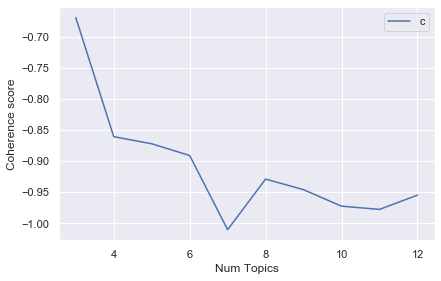

In [17]:
# Show graph
x = range(minimum_number_components, maximum_number_components+1)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### 3.2 Generating Topics

In [18]:
vis = prepare(best_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.065555  0.072953       1        1  49.378120
2     -0.059406 -0.075386       2        1  36.757034
0      0.124962  0.002433       3        1  13.864848, topic_info=              Term         Freq        Total Category  logprob  loglift
294        fazenda  1985.000000  1985.000000  Default  30.0000  30.0000
946         evento  1074.000000  1074.000000  Default  29.0000  29.0000
1505  contribuicao  1743.000000  1743.000000  Default  28.0000  28.0000
1128   compensacao   892.000000   892.000000  Default  27.0000  27.0000
50        nacional  2010.000000  2010.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
237        direito   453.955231  3987.505615   Topic3  -5.1969  -0.1971
1054         turma   357.556946  2112.631348   Topic3  -5.4356   0.1994
367        julgado   322.094421  1176.919189   Topic3  -5.5400   0.6800
483   procuradoria   337.635559  1862.433105   Topic3  -5.4929   0.2681
18    constituicao   324.522369  4265.144531   Topic3  -5.5325  -0.6001

[257 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
4165      1  0.002079  ST_ARTIGO_149
4165      2  0.997786  ST_ARTIGO_149
4137      2  0.036141  ST_ARTIGO_151
4137      3  0.960309  ST_ARTIGO_151
4086      2  0.997914  ST_ARTIGO_153
...     ...       ...            ...
575       1  0.175787        valores
575       2  0.695924        valores
575       3  0.127626        valores
4162      2  0.019066      vincendos
4162      3  0.972356      vincendos

[515 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

### 4.2 Generating Heatmap for Text Similarities

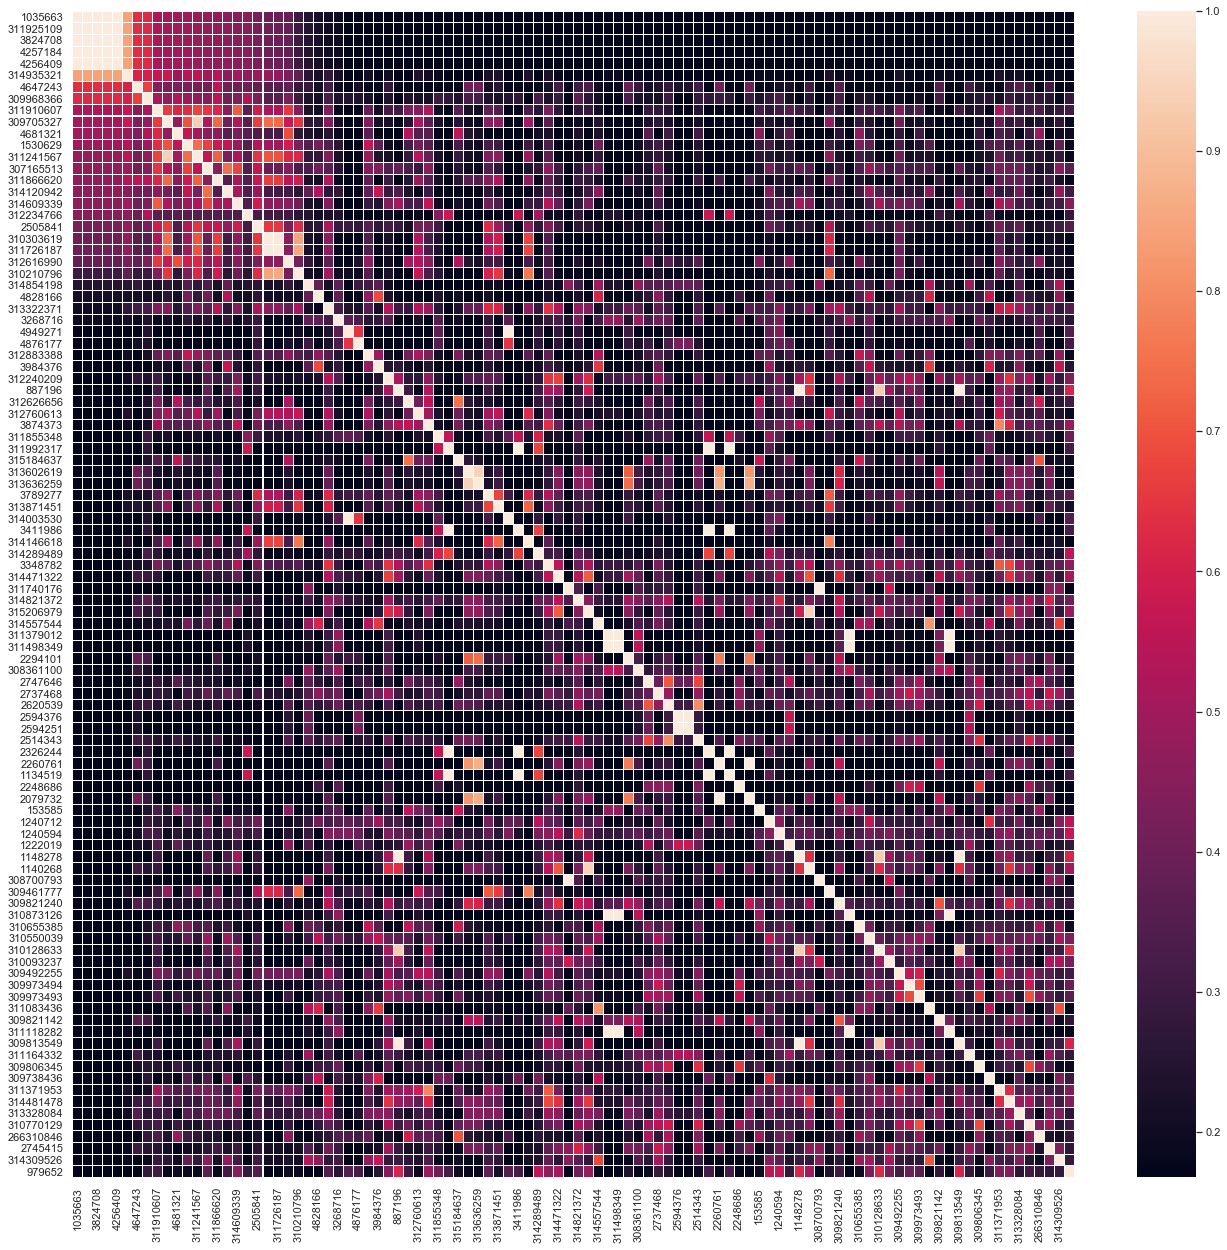

In [19]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(mapped_distances_df, linewidths=0.01)

# 4. Evaluation

## 4.1 Time Consumed

In [20]:
print("Tempo consumido foi: ", total_time)

Tempo consumido foi:  0:16:21.597390


## 4.2 Similarities Surface
 If we analyses the similarities as if it was a surface we can measure how smooth they change. If the smoothness is high, the less informative the algorithm is to differentiate documents

In [21]:
result = ndimage.laplace(mapped_distances_df.to_numpy())
surface_roughness = np.average(np.absolute(result))
print("Surface Smoothness(0 to 1): ", 1 - surface_roughness)

Surface Smoothness(0 to 1):  0.6515315111656195


## Scoring

In [32]:


print("Similarity Scoring Sample Size: " + "{}".format(similarity_score['size']))
print("Similarity Accuracy: " + "{:.4f}".format(similarity_score['accuracy']))
print("Similarity Precision: " + "{:.4f}".format(similarity_score['precisio']))
print("Similarity Recall: " + "{:.4f}".format(similarity_score['recall']))
print("Similarity F1 Score: " + "{:.4f}".format(similarity_score['f1_score']))

# As we don't have enough samples for similarity scoring, let's use
# the classes as an approximation
print()
print("Class Scoring Sample Size: " + "{}".format(class_score['size']))
print("Class Accuracy: " + "{:.4f}".format(class_score['accuracy']))
print("Class Precision: " + "{:.4f}".format(class_score['precision']))
print("Class Recall: " + "{:.4f}".format(class_score['recall']))
print("Class F1 Score: " + "{:.4f}".format(class_score['f1_score']))



Similarity Scoring Sample Size: 132
Similarity Accuracy: 0.9241
Similarity Precision: 0.9589
Similarity Recall: 0.5556
Similarity F1 Score: 0.7035

Class Scoring Sample Size: 1000000
Class Accuracy: 0.6250
Class Precision: 0.5167
Class Recall: 0.3284
Class F1 Score: 0.4015


# 5. Bibliography
Topic Modeling and Latent Dirichlet Allocation (LDA) in Python. Susan Li.
[Available at](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24). Last visited: 30/04/2020

Topic Modeling with Gensim (Python). Selva Prabhakaran. [Available at](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/). Last visited: 04/05/2020

Pre-processing and training LDA. Mohit Rathore. [Available at](https://markroxor.github.io/gensim/static/notebooks/lda_training_tips.html). Last visited: 04/05/2020
